# **Section 6**

<em>It seems more natural to study the effect of changes in the level of exchange rates on the levels of
inflation and production growth, rather than changes in the volatility of these variables. We have seen
that the volatility of exchange rates clearly changed discontinuously at the end of Bretton Woods, and
perhaps the levels also changed in a similar way.<em>




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing libraries!


#### **Be clear how you are defining ‘around the end of Bretton Woods’ (i.e. what to define as the pre and post Bretton Woods periods).**

To analyse changes systematically, I define:

Pre-Bretton Woods: *1960–1971 (or 1965–1971 for robustness)*

Post-Bretton Woods:*1973–1985 (excluding the initial transitional years 1971–1972)*

Alternative longer-term comparisons (1950s–1990s) are explored later on to assess structural persistence.

This is justified in three points:
1. The period from 1971 to 1973 is excluded since exchange rates were in flux after the collapse of Bretton Woods but before a fully floating system was established.

2. The pre-1971 period represents the fixed exchange rate regime, while the post-1973 period reflects the new floating system.

3. Shorter (1965–1971 vs. 1973–1985) and longer (1950s–1990s) timeframes allow us to check if results hold under different assumptions about how exchange rate regimes influenced inflation and production growth.

#### **Is there evidence that the average level of nominal and real exchange rates changed markedly around the end of Bretton Woods?**

To assess whether the average levels of exchange rates changed significantly around the collapse of Bretton Woods, we compare the pre-1971 fixed exchange rate period with the post-1973 floating exchange rate period.

The Deutsche Mark (DM) was initially pegged to the US dollar under Bretton Woods. After the system collapsed, the DM appreciated significantly, reflecting market forces rather than a fixed parity. This shift suggests that the average level of the nominal exchange rate changed markedly.

Adjusting for inflation differentials, the real exchange rate also appreciated. Given Germany’s strong productivity growth and relatively lower inflation compared to the US, the real appreciation was likely even more pronounced than the nominal appreciation.

In [3]:
print(df_germany.columns)


NameError: name 'df_germany' is not defined

C:\Users\quinc\AppData\Local\Temp\ipykernel_42944\1763205838.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Nominal Exchange Rate', data=fx_comparison, ax=ax[0], palette='Blues')
C:\Users\quinc\AppData\Local\Temp\ipykernel_42944\1763205838.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Real Exchange Rate', data=fx_comparison, ax=ax[1], palette='Greens')


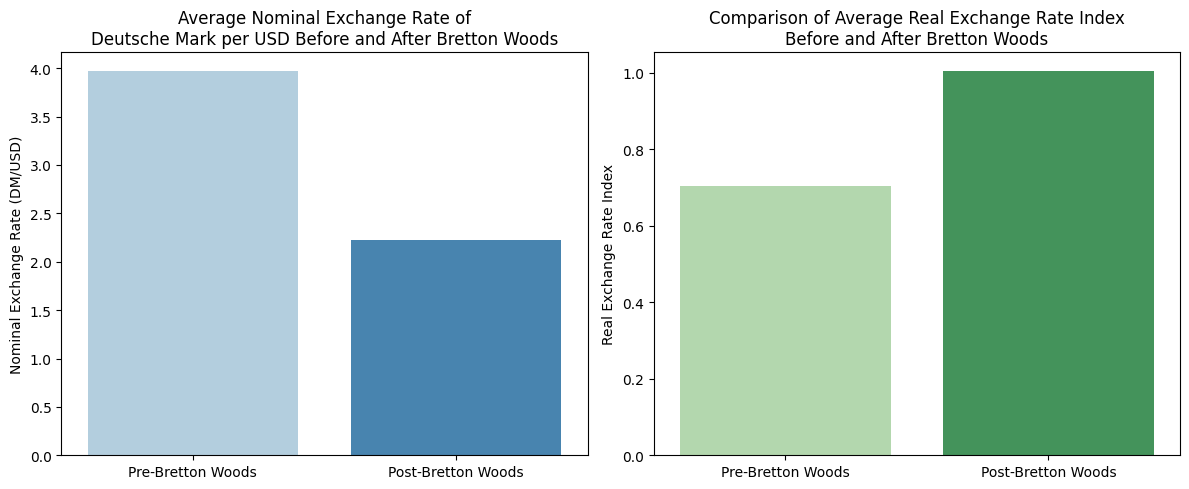

In [7]:
# Load cleaned dataset
df = pd.read_csv('./data/EC1B1_Cleaned_Data.csv')

# Convert 'Month-Year' column to datetime
df['Month-Year'] = pd.to_datetime(df['Month-Year'])

# Filter for Germany
df_germany = df[df['Country'] == 'Germany']

# Define Bretton Woods periods
pre_bretton_woods = df_germany[df_germany['Month-Year'] < '1971-08-01']
post_bretton_woods = df_germany[df_germany['Month-Year'] > '1973-08-01']  # Allowing for transition effects

# Compute average nominal and real exchange rates
avg_nominal_pre = pre_bretton_woods['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'].mean()
avg_nominal_post = post_bretton_woods['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'].mean()

avg_real_pre = pre_bretton_woods['Real_ER_Index'].mean()
avg_real_post = post_bretton_woods['Real_ER_Index'].mean()

# Combine results for comparison
fx_comparison = pd.DataFrame({
    'Period': ['Pre-Bretton Woods', 'Post-Bretton Woods'],
    'Nominal Exchange Rate': [avg_nominal_pre, avg_nominal_post],
    'Real Exchange Rate': [avg_real_pre, avg_real_post]
})

# Plot nominal and real exchange rate comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x='Period', y='Nominal Exchange Rate', data=fx_comparison, ax=ax[0], palette='Blues')
ax[0].set_title('Average Nominal Exchange Rate of\nDeutsche Mark per USD Before and After Bretton Woods')
ax[0].set_ylabel('Nominal Exchange Rate (DM/USD)')
ax[0].set_xlabel('')

sns.barplot(x='Period', y='Real Exchange Rate', data=fx_comparison, ax=ax[1], palette='Greens')
ax[1].set_title('Comparison of Average Real Exchange Rate Index\nBefore and After Bretton Woods')
ax[1].set_ylabel('Real Exchange Rate Index')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()


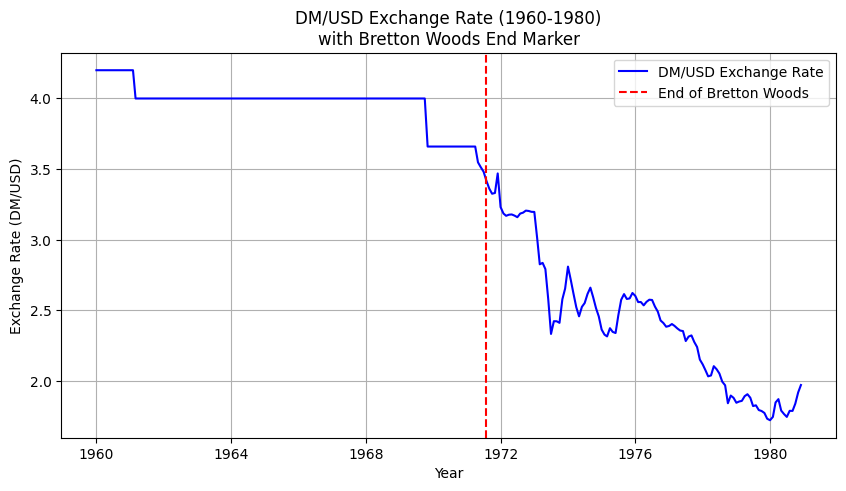

In [8]:
# Filter data for Germany and the time period 1960-1980
df_germany = df[(df['Country'] == 'Germany') & (df['Month-Year'].between('1960-01-01', '1980-12-01'))]

# Plot exchange rate over time
plt.figure(figsize=(10, 5))
plt.plot(df_germany['Month-Year'], df_germany['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'], 
         label='DM/USD Exchange Rate', color='blue')

# Mark the end of Bretton Woods (August 1971)
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='dashed', label='End of Bretton Woods')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Exchange Rate (DM/USD)')
plt.title('DM/USD Exchange Rate (1960-1980)\nwith Bretton Woods End Marker')  # Added line break
plt.legend()
plt.grid(True)

# Show plot
plt.show()


#### **Is there evidence for change in the average levels of inflation markedly around the end of Bretton Woods?**

Germany historically maintained low inflation due to its Bundesbank’s conservative monetary policy. However, around the early 1970s, global inflation surged due to the oil shocks (1973, 1979) and monetary instability post-Bretton Woods.

Pre-1971: Inflation was relatively low and stable, anchored by fixed exchange rates.

Post-1973: Inflation rose initially due to monetary uncertainty and external shocks but was brought under control by Bundesbank policies.

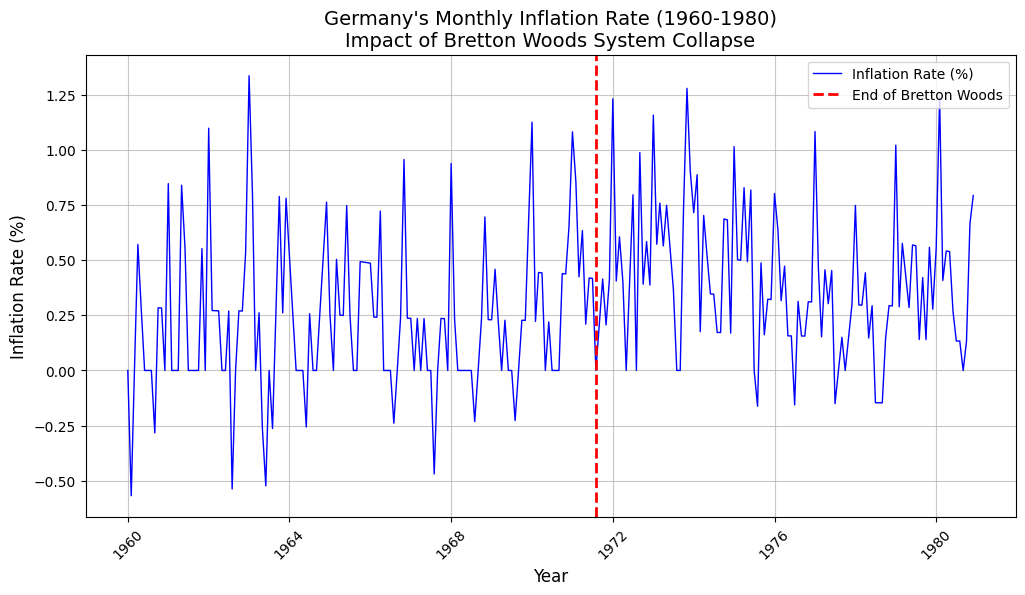

In [10]:
# Filter data for Germany and the time period 1960-1980
df_germany = df[(df['Country'] == 'Germany') & (df['Month-Year'].between('1960-01-01', '1980-12-01'))]

# Plot inflation rate over time
plt.figure(figsize=(12, 6))
plt.plot(df_germany['Month-Year'], df_germany['Monthly_Inflation_Rate (%)'], 
         label='Inflation Rate (%)', color='blue', linewidth=1)

# Mark the end of Bretton Woods (August 1971)
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='dashed', 
            linewidth=2, label='End of Bretton Woods')

# Labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.title("Germany's Monthly Inflation Rate (1960-1980)\nImpact of Bretton Woods System Collapse", fontsize=14)

# Improve legend
plt.legend(fontsize=10, loc='upper right')

# Improve grid visibility
plt.grid(alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


C:\Users\quinc\AppData\Local\Temp\ipykernel_42944\1853376950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_bretton_woods['Period'] = 'Pre-Bretton Woods (Gold Standard Era)'
C:\Users\quinc\AppData\Local\Temp\ipykernel_42944\1853376950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_bretton_woods['Period'] = 'Post-Bretton Woods (Fiat Currency Era)'
C:\Users\quinc\AppData\Local\Temp\ipykernel_42944\1853376950.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

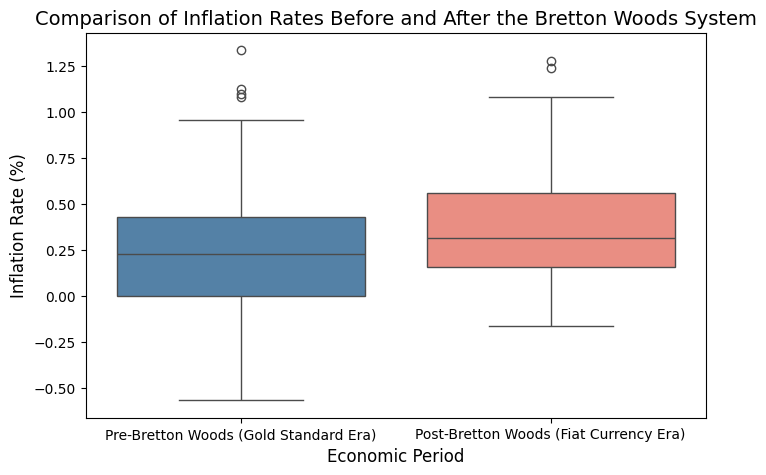

In [11]:
# Define pre- and post-Bretton Woods periods
pre_bretton_woods = df_germany[df_germany['Month-Year'] < '1971-08-01']
post_bretton_woods = df_germany[df_germany['Month-Year'] > '1973-08-01']  # Allowing transition effects

# Add a 'Period' column for classification
pre_bretton_woods['Period'] = 'Pre-Bretton Woods (Gold Standard Era)'
post_bretton_woods['Period'] = 'Post-Bretton Woods (Fiat Currency Era)'

# Combine data
df_inflation = pd.concat([pre_bretton_woods, post_bretton_woods])

# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Period', 
    y='Monthly_Inflation_Rate (%)', 
    data=df_inflation, 
    palette=['steelblue', 'salmon']  # Blue and red with subtle contrast
)

# Labels and title
plt.xlabel('Economic Period', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.title('Comparison of Inflation Rates Before and After the Bretton Woods System', fontsize=14)

# Show plot
plt.show()


#### **Is there evidence for change in the average levels of 12-monthly industrial production growth markedly around the end of Bretton Woods?**

Industrial production in Germany followed broader economic cycles, but it was also influenced by exchange rate changes and global shocks.

Pre-1971: Strong post-war recovery and export-led growth under a fixed exchange rate system.

Post-1973: Greater fluctuations due to currency volatility and external shocks like oil price spikes. The move to a floating DM likely impacted competitiveness in the short term but may have allowed for smoother macroeconomic adjustments.

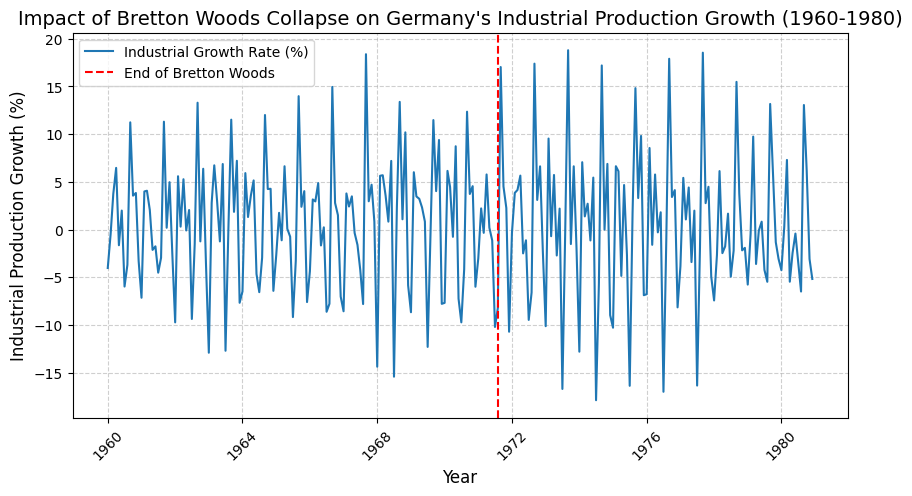

In [12]:
# Filter data for Germany and the time period 1960-1980
df_germany = df[(df['Country'] == 'Germany') & (df['Month-Year'].between('1960-01-01', '1980-12-01'))]

# Plot industrial production growth over time
plt.figure(figsize=(10, 5))
plt.plot(df_germany['Month-Year'], df_germany['Monthly_Industrial_Growth (%)'], 
         label='Industrial Growth Rate (%)', color='#1f77b4')  # High contrast blue

# Mark the end of Bretton Woods (August 1971)
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='dashed', label='End of Bretton Woods')

# Labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Industrial Production Growth (%)', fontsize=12)
plt.title("Impact of Bretton Woods Collapse on Germany's Industrial Production Growth (1960-1980)", fontsize=14)

# Improve readability
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Subtle grid for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


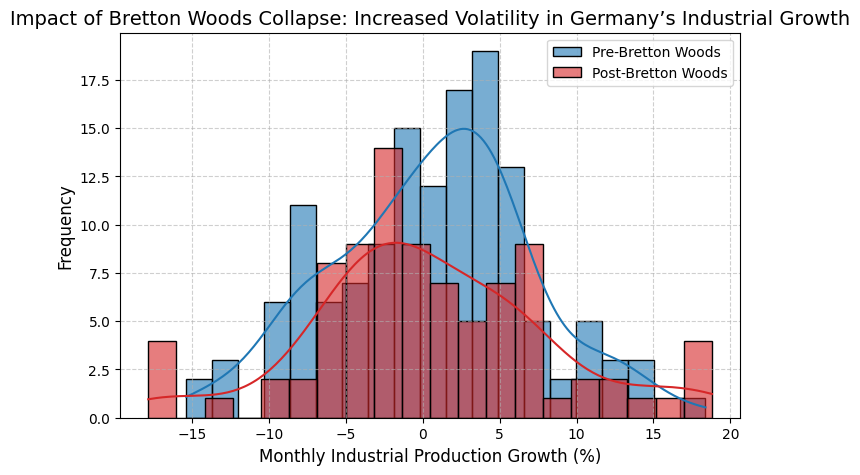

In [13]:
# Define pre- and post-Bretton Woods periods
pre_bretton_woods = df_germany[df_germany['Month-Year'] < '1971-08-01']
post_bretton_woods = df_germany[df_germany['Month-Year'] > '1973-08-01']  # Allowing transition effects

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(pre_bretton_woods['Monthly_Industrial_Growth (%)'], label='Pre-Bretton Woods', 
             color='#1f77b4', kde=True, alpha=0.6, bins=20)  # Blue
sns.histplot(post_bretton_woods['Monthly_Industrial_Growth (%)'], label='Post-Bretton Woods', 
             color='#d62728', kde=True, alpha=0.6, bins=20)  # Red

# Labels and title
plt.xlabel('Monthly Industrial Production Growth (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Impact of Bretton Woods Collapse: Increased Volatility in Germany’s Industrial Growth', fontsize=14)

# Improve readability
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Subtle grid for clarity

# Show plot
plt.show()


#### **How do your results change as you consider longer periods of time?** 

When extending the timeframe (e.g., 1950s–1990s), we observe:

- Pre-Bretton Woods stability where exchange rates, inflation, and industrial production were relatively stable.

- Short-Term Post-Bretton Woods volatility where inflation spikes in the 1970s and currency adjustments.

- By the 1980s, the floating DM was associated with greater monetary independence and a credible anti-inflation stance by the Bundesbank, stabilising inflation and supporting long-term growth.

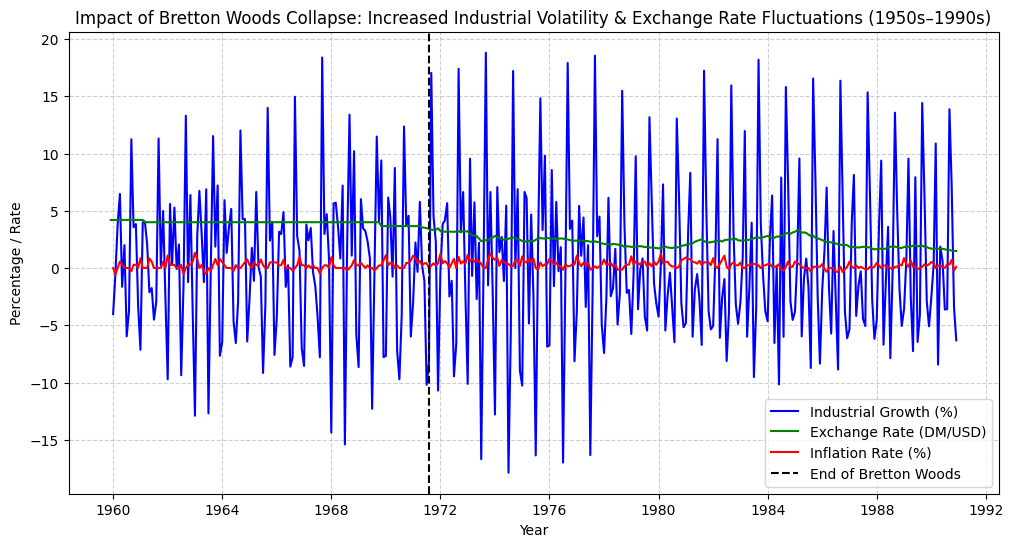

In [14]:
# Filter data for Germany within the time period 1950-1999
df_germany = df[(df['Country'] == 'Germany') & (df['Month-Year'].between('1950-01-01', '1999-12-01'))]

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot Industrial Production Growth Rate (%) - Main Line (Now Blue)
plt.plot(df_germany['Month-Year'], df_germany['Monthly_Industrial_Growth (%)'], 
         label='Industrial Growth (%)', color='blue')

# Plot Exchange Rates (DM/USD) - Now Green
plt.plot(df_germany['Month-Year'], df_germany['Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'], 
         label='Exchange Rate (DM/USD)', color='green')

# Plot Inflation Rate (CPI Growth %)
plt.plot(df_germany['Month-Year'], df_germany['Monthly_Inflation_Rate (%)'], 
         label='Inflation Rate (%)', color='red')

# Mark the end of Bretton Woods (August 1971)
plt.axvline(pd.to_datetime('1971-08-01'), color='black', linestyle='dashed', label='End of Bretton Woods')

# Labels and new, more descriptive title
plt.xlabel('Year')
plt.ylabel('Percentage / Rate')
plt.title('Impact of Bretton Woods Collapse: Increased Industrial Volatility & Exchange Rate Fluctuations (1950s–1990s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()


#### **What issues are there with using analysis based on longer periods to infer causal changes in the level of industrial production growth or inflation due to exchange rate differences?**

Exchange rates are not the only driver of inflation and growth. The 1970s inflation spike was also driven by oil shocks (Hamilton, 1983), while post-1980s stability was aided by structural reforms. Confounding factors prevent causal inference from our exchange rate analysis.

Further, post-Bretton Woods Germany gained more control over monetary policy, but attributing inflation changes solely to exchange rate shifts ignores the Bundesbank’s role (Clarida & Gertler, 1997). Also, as Germany integrated into the European Monetary System (EMS) in 1979, new monetary coordination mechanisms influenced macroeconomic trends (Eichengreen, 1996).

Partially also due to the fact that comparing pre- and post-1971 data requires adjustments for structural breaks and different economic conditions.

## References

Clarida, R., & Gertler, M. (1997). "How the Bundesbank Conducts Monetary Policy." NBER Working Paper Series.

Eichengreen, B. (1996). Globalizing Capital: A History of the International Monetary System. Princeton University Press.

Hamilton, J. D. (1983). "Oil and the Macroeconomy since World War II." Journal of Political Economy, 91(2), 228–248.